# Load Data

In [39]:
import os
import pandas as pd
import numpy as np

def load_data(path):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    use_cols = ['age1',
                'yield', 'sale', 'value',
                'land', 
                'cvl00', 'cvl01', 'cvl02', 'cvl03',
                'cvl10', 'cvl11', 'cvl12', 'cvl13',
                'pl00', 'pl01', 'pl02', 'pl03',
                'pl10', 'pl11', 'pl12', 'pl13',
                'size', # cat
                'cony']
    
    dataframe_list = []
    for year in years[:7]:
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀1).xlsx')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀2).xlsx')
        
        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)
        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape)
    
    for year in years[7:9]:
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀 1).xls')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_1. 밤(엑셀 2).xls')
        
        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)
        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape)
    
    
    file_path = os.path.join(path, str(years[9])+'년', str(years[9])+'년 임산물생산비조사_통합 데이터_1. 밤.xlsx')
    forest_2019 = pd.read_excel(file_path)
    dataframe_list.append(forest_data.loc[:,use_cols])
    print(2019, forest_2019.shape)
    
    data = pd.concat(dataframe_list, axis=0)
    
    return data
    
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)')

2010 (216, 416)
2011 (209, 416)
2012 (216, 416)
2013 (220, 416)
2014 (255, 416)
2015 (258, 416)
2016 (252, 416)
2017 (253, 416)
2018 (231, 416)
2019 (226, 432)


In [40]:
data

,age1,yield,sale,value,land,cvl00,cvl01,cvl02,cvl03,cvl10,...,pl00,pl01,pl02,pl03,pl10,pl11,pl12,pl13,size,cony
0,70,10734.0,10539.0,14604100.0,320704.4848,19.54,0.0,0.0,19.54,19.54,...,16.35,0.0,0.0,16.35,16.35,0.0,0.0,16.35,4,656.513761
1,67,1495.0,1360.0,1857300.0,320704.4848,8.30,0.0,0.0,8.30,1.50,...,1.53,0.0,0.0,1.53,0.20,0.0,0.0,0.20,1,977.124183
2,65,1323.0,1223.0,1403200.0,320704.4848,1.05,0.0,0.0,1.05,1.05,...,1.05,0.0,0.0,1.05,1.05,0.0,0.0,1.05,1,1260.000000
3,67,4691.0,4571.0,6692850.0,320704.4848,4.36,0.0,0.0,4.36,0.40,...,4.36,0.0,0.0,4.36,0.40,0.0,0.0,0.40,3,1075.917431
4,69,2590.0,2370.0,4939720.0,320704.4848,1.16,0.0,0.0,1.16,1.16,...,1.16,0.0,0.0,1.16,1.16,0.0,0.0,1.16,1,2232.758621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,59,6901.0,46.0,25175270.0,243869.0000,2.50,0.0,0.0,2.50,0.00,...,2.50,0.0,0.0,2.50,0.00,0.0,0.0,0.00,2,2760.400000
227,60,10063.0,8050.0,29776110.0,243869.0000,4.00,0.0,0.0,4.00,0.00,...,4.00,0.0,0.0,4.00,0.00,0.0,0.0,0.00,3,2515.750000
228,56,11040.0,4922.0,22261470.0,243869.0000,6.00,0.0,0.0,6.00,0.00,...,6.00,0.0,0.0,6.00,0.00,0.0,0.0,0.00,4,1840.000000
229,65,34500.0,22184.0,202270740.0,243869.0000,12.00,0.0,0.0,12.00,12.00,...,12.00,0.0,0.0,12.00,12.00,0.0,0.0,12.00,4,2875.000000


In [41]:
for column in data.columns:
    if len(data[column].value_counts()) <= 15:
        print(data[column].value_counts())
        print()

1    854
2    537
3    534
4    416
Name: size, dtype: int64



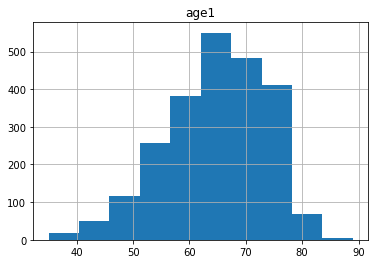

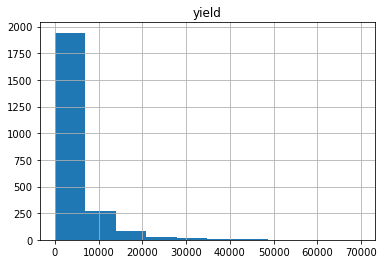

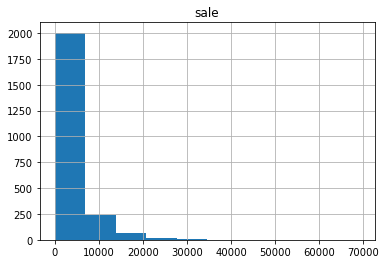

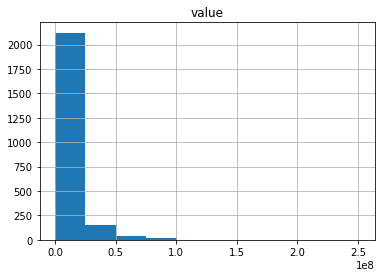

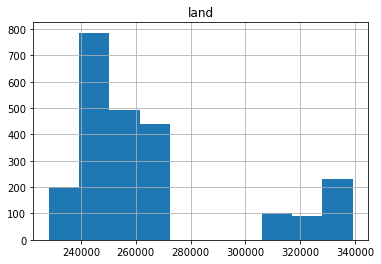

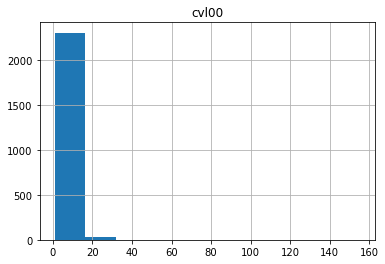

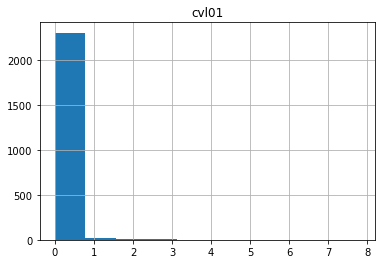

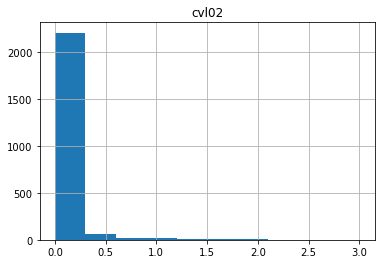

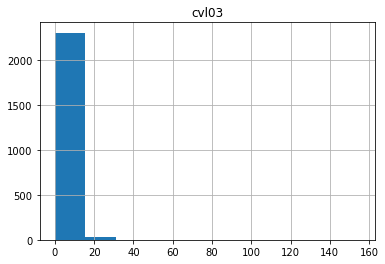

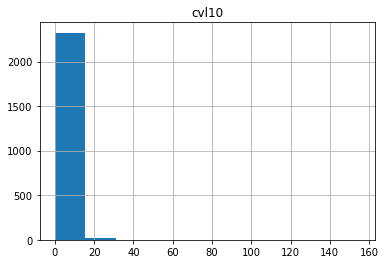

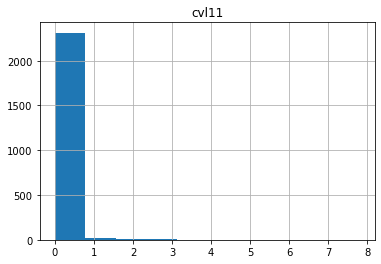

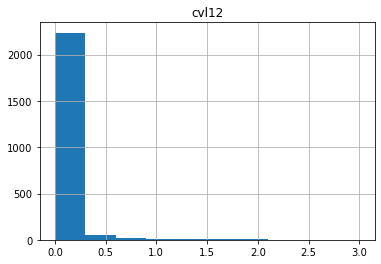

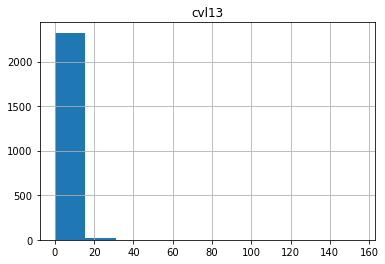

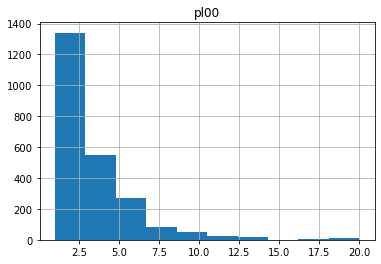

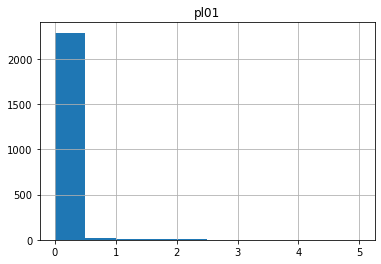

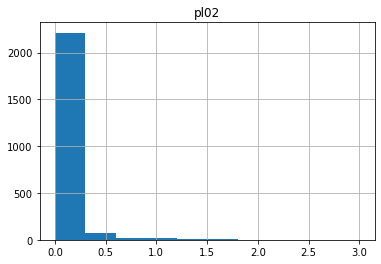

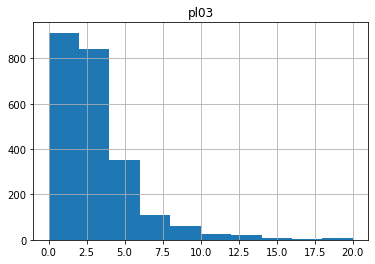

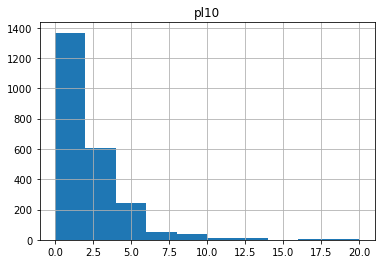

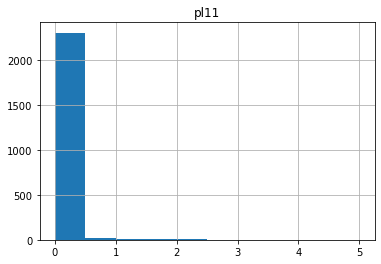

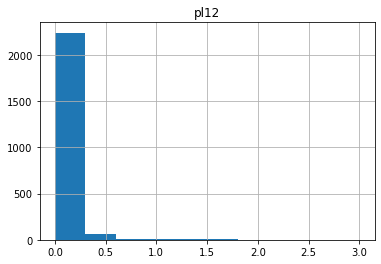

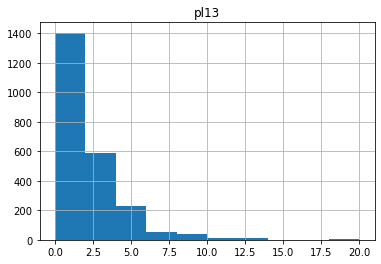

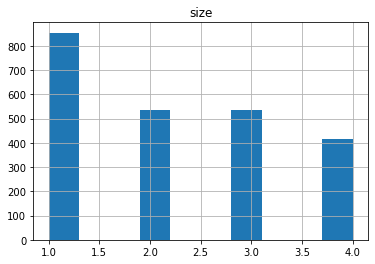

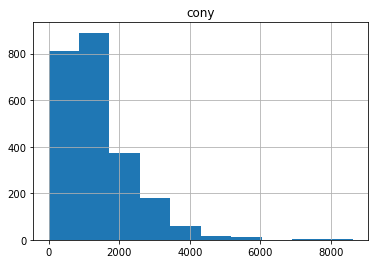

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Log Transform

In [43]:
y_data = np.log1p(data['cony'])

## Categorical Variable processing

In [44]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(data.loc[:, categorical_variables])
onehot = onehot_encoder.fit_transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3, 4])]
(2341, 4)


## Numerical Variable processing

In [45]:
from sklearn.preprocessing import MinMaxScaler

numerical_variables = ['age1',
                'yield', 'sale', 'value',
                'land', 
                'cvl00', 'cvl01', 'cvl02', 'cvl03',
                'cvl10', 'cvl11', 'cvl12', 'cvl13',
                'pl00', 'pl01', 'pl02', 'pl03',
                'pl10', 'pl11', 'pl12', 'pl13']
X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, numerical_variables])
X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.64814815, 0.15429508, 0.15255341, ..., 0.        , 0.        ,
        0.8175    ],
       [0.59259259, 0.02148977, 0.01968618, ..., 0.        , 0.        ,
        0.01      ],
       [0.55555556, 0.01901736, 0.01770309, ..., 0.        , 0.        ,
        0.0525    ],
       ...,
       [0.38888889, 0.15869365, 0.0712466 , ..., 0.        , 0.        ,
        0.        ],
       [0.55555556, 0.49591766, 0.32111632, ..., 0.        , 0.        ,
        0.6       ],
       [0.57407407, 0.15704059, 0.16581263, ..., 0.        , 0.        ,
        0.2       ]])

In [46]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,age1,yield,sale,value,land,cvl00,cvl01,cvl02,cvl03,cvl10,...,pl02,pl03,pl10,pl11,pl12,pl13,0,1,2,3
0,0.648148,0.154295,0.152553,0.058183,0.832995,0.120390,0.0,0.0,0.126065,0.126065,...,0.0,0.8175,0.8175,0.0,0.0,0.8175,0.0,0.0,0.0,1.0
1,0.592593,0.021490,0.019686,0.007400,0.832995,0.047403,0.0,0.0,0.053548,0.009677,...,0.0,0.0765,0.0100,0.0,0.0,0.0100,1.0,0.0,0.0,0.0
2,0.555556,0.019017,0.017703,0.005590,0.832995,0.000325,0.0,0.0,0.006774,0.006774,...,0.0,0.0525,0.0525,0.0,0.0,0.0525,1.0,0.0,0.0,0.0
3,0.592593,0.067430,0.066166,0.026664,0.832995,0.021818,0.0,0.0,0.028129,0.002581,...,0.0,0.2180,0.0200,0.0,0.0,0.0200,0.0,0.0,1.0,0.0
4,0.629630,0.037230,0.034306,0.019680,0.832995,0.001039,0.0,0.0,0.007484,0.007484,...,0.0,0.0580,0.0580,0.0,0.0,0.0580,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,0.444444,0.099198,0.000666,0.100299,0.141636,0.009740,0.0,0.0,0.016129,0.000000,...,0.0,0.1250,0.0000,0.0,0.0,0.0000,0.0,1.0,0.0,0.0
2337,0.462963,0.144650,0.116525,0.118629,0.141636,0.019481,0.0,0.0,0.025806,0.000000,...,0.0,0.2000,0.0000,0.0,0.0,0.0000,0.0,0.0,1.0,0.0
2338,0.388889,0.158694,0.071247,0.088690,0.141636,0.032468,0.0,0.0,0.038710,0.000000,...,0.0,0.3000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,1.0
2339,0.555556,0.495918,0.321116,0.805852,0.141636,0.071429,0.0,0.0,0.077419,0.077419,...,0.0,0.6000,0.6000,0.0,0.0,0.6000,0.0,0.0,0.0,1.0


In [47]:
X_data = np.array(X_data_df)
y_data = np.array(y_data)

# Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.1,
                                                    random_state=1234)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2106, 25) (2106,)
(235, 25) (235,)


# Modeling

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [50]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[7.49609735 5.27196543 7.31205151 7.18765716 7.21864327 7.44882419
 7.44818012 7.25296801 6.9252677  7.11679991]


In [51]:
mean_squared_error(y_test, dt_pred)

0.015678401637371796

## RandomForest

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 3000, max_features = 'sqrt', 
                           random_state = 1000)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=3000, random_state=1000)

In [53]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[7.42587876 5.2365766  7.44161168 7.1916573  7.11836025 7.27268914
 7.4247713  7.15979057 7.05514008 7.04376892]


In [54]:
mean_squared_error(y_test, rf_pred)

0.02328354941476239

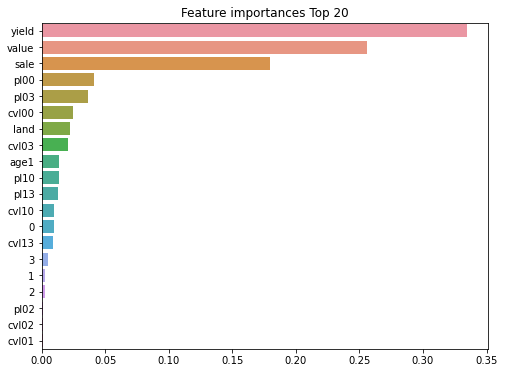

In [55]:
import seaborn as sns

importances_values = rf.feature_importances_ 
importances = pd.Series(importances_values, index=X_data_df.columns)

top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## Ridge

In [59]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.5)
ridge.fit(X_train, y_train)

Ridge(alpha=1.5)

In [60]:
print(ridge.score(X_train, y_train))

0.3692312663577706


In [61]:
ridge_pred = ridge.predict(X_test)
mean_squared_error(y_test, ridge_pred)

0.45090522404692646

## LASSO

In [62]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [63]:
print(lasso.score(X_train, y_train))

0.3809000619608348


In [64]:
lasso_pred = lasso.predict(X_test)
mean_squared_error(y_test, lasso_pred)

0.44397106774771

## GBM

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=8)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[7.49939665 5.02929808 7.40761272 7.18750489 7.21865099 7.34457943
 7.44813311 7.25293538 6.98989751 7.10421706]


In [66]:
mean_squared_error(y_test, gbm_pred)

0.006822770959619239

## AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 500, learning_rate = 0.1)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print(ada_pred[:10])

[7.37688137 5.66049131 7.30351576 7.03321948 7.03441734 7.2976455
 7.27941801 7.31921205 7.03321948 7.0877554 ]


In [68]:
mean_squared_error(y_test, ada_pred)

0.0856018623871095

## XGBoost

In [69]:
import xgboost as xgb
print(xgb.__version__)

xgb_reg = xgb.XGBRegressor(learning_rate=0.3, max_depth=8, 
                           gamma=0.5, n_estimators=300,
                           subsample=0.9, colsample_bytree=0.8)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

1.3.3
[7.5509043 4.857779  7.3602433 7.1763177 7.1247973 7.3096604 7.451911
 7.2039213 7.0462995 7.0878043]


In [70]:
mean_squared_error(y_test, xgb_pred)

0.015737354019416658

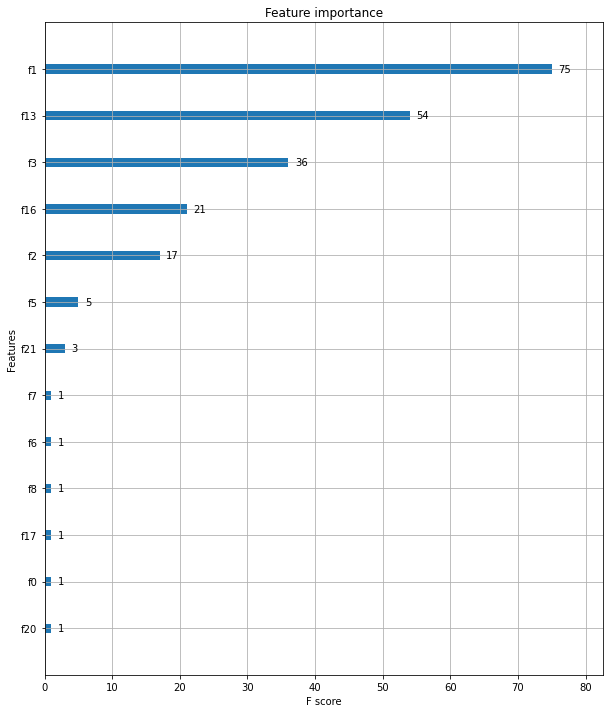

In [71]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [72]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=1000, max_depth=15)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMRegressor(max_depth=15, n_estimators=1000)

In [73]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[7.49499039 5.07492057 7.34033684 7.2027145  7.20823557 7.30336929
 7.45489391 7.25025329 7.00556707 7.13469867]


In [74]:
mean_squared_error(y_test, lgb_pred)

0.012004808175589857

# Ensemble

In [78]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
    def predict(self, X_test):
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)
            
        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights)
        result['MSE'] = mse

        return result.sort_values('MSE', ascending=True)

In [79]:
models = {'GBM' : gbm, 'XGBOOST': xgb_reg, 'LightGBM' : lgb_reg}

ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result.head(10)

,0,1,2,MSE
13086,0.547061,0.224446,0.228493,0.005648
15134,0.546079,0.225201,0.228719,0.005648
9409,0.547538,0.223686,0.228776,0.005648
11545,0.552674,0.222604,0.224721,0.005648
27204,0.555037,0.222350,0.222613,0.005648
19664,0.543053,0.228232,0.228715,0.005648
14814,0.551000,0.220751,0.228249,0.005648
28963,0.555146,0.222693,0.222161,0.005648
6234,0.554173,0.220158,0.225669,0.005648
24955,0.552351,0.226156,0.221493,0.005648


In [82]:
optimal_weight = np.round(result.iloc[0,:-1], 3).tolist()
print(optimal_weight)

[0.547, 0.224, 0.228]


In [83]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[7.50994027 5.00125169 7.3816371  7.18846771 7.19522964 7.32734443
 7.45052321 7.24133311 7.00612043 7.10749369]


In [84]:
mean_squared_error(y_test, preds)

0.005648055512799421

# Evaludation

In [86]:
inverse_transformed_pred = np.expm1(preds)
inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
inverse_transformed_y_test = np.expm1(y_test)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[1825.10446963  147.59904279 1605.21715403 1323.07278997 1332.05641198
 1520.33638647 1719.76322256 1394.95369548 1102.36560685 1220.08329521]
[1815.33333333  142.12651413 1614.17322835 1322.         1363.63636364
 1483.93782383 1715.73604061 1411.29032258 1112.5        1254.5       ]


In [87]:
np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred))

110.29058611026815

In [88]:
inverse_transformed_pred = pd.Series(np.round(inverse_transformed_pred,1), name='예측값')
inverse_transformed_y_test= pd.Series(np.round(inverse_transformed_y_test,1), name='생산량')
result = pd.concat([inverse_transformed_y_test, inverse_transformed_pred], axis=1)
result[:30]

,생산량,예측값
0,1815.3,1825.1
1,142.1,147.6
2,1614.2,1605.2
3,1322.0,1323.1
4,1363.6,1332.1
5,1483.9,1520.3
6,1715.7,1719.8
7,1411.3,1395.0
8,1112.5,1102.4
9,1254.5,1220.1
